#Import Library


In [ ]:
!pip install gdown
!pip install matplotlib
!pip install wget
import gdown
import pandas as pd
import numpy as np
import os
import math
import scipy.stats as stat
import datetime as dt
import seaborn as sb
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=fd007860f7c780b762f764002d56b33304282dc8c414e81436c87624d1b7f3ff
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


#Import Data

In [ ]:
url1 = "https://raw.githubusercontent.com/hendraswntr/MiniProject-DataAnalyst-RFM_Analysis/main/data/Products.csv"
url2 = "https://raw.githubusercontent.com/hendraswntr/MiniProject-DataAnalyst-RFM_Analysis/main/data/OrderDetails.csv"
url3 = "https://raw.githubusercontent.com/hendraswntr/MiniProject-DataAnalyst-RFM_Analysis/main/data/Orders.csv"
url4 = "https://raw.githubusercontent.com/hendraswntr/MiniProject-DataAnalyst-RFM_Analysis/main/data/Customers.csv"

products = pd.read_csv(url1, sep=';')
orderdetails = pd.read_csv(url2, sep=';')
orders = pd.read_csv(url3, sep=';')
customers = pd.read_csv(url4, sep=';')


In [ ]:
products.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,False
1,2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,False
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,False
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,"21,35",0,0,0,True


In [ ]:
orderdetails.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14,12,0
1,10248,42,"9,8",10,0
2,10248,72,"34,8",5,0
3,10249,14,"18,6",9,0
4,10249,51,"42,4",40,0


In [ ]:
orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04 00:00:00,1996-08-01 00:00:00,1996-07-16 00:00:00,3,"32,38",Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05 00:00:00,1996-08-16 00:00:00,1996-07-10 00:00:00,1,"11,61",Toms Spezialitoten,Luisenstr. 48,Monster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08 00:00:00,1996-08-05 00:00:00,1996-07-12 00:00:00,2,"65,83",Hanari Carnes,"Rua do Paoo, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08 00:00:00,1996-08-05 00:00:00,1996-07-15 00:00:00,1,"41,34",Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09 00:00:00,1996-08-06 00:00:00,1996-07-11 00:00:00,2,"51,3",Supromes dolices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [ ]:
customers.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitucion 2222,Moxico D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taqueroa,Antonio Moreno,Owner,Mataderos 2312,Moxico D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkop,Christina Berglund,Order Administrator,Berguvsvogen 8,Luleo,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


#Data Merge

In [ ]:
data1 = pd.merge(customers, orders, on=['CustomerID'])
data2 = pd.merge(data1, orderdetails, on=['OrderID'])
data = pd.merge(data2, products, on=['ProductID'])

In [ ]:
data.head()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,...,Discount,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,"0,25",Rossle Sauerkraut,12,7,25 - 825 g cans,"45,6",26,0,0,True
1,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,...,0,Rossle Sauerkraut,12,7,25 - 825 g cans,"45,6",26,0,0,True
2,BERGS,Berglunds snabbkop,Christina Berglund,Order Administrator,Berguvsvogen 8,Luleo,NaN,S-958 22,Sweden,0921-12 34 65,...,0,Rossle Sauerkraut,12,7,25 - 825 g cans,"45,6",26,0,0,True
3,BERGS,Berglunds snabbkop,Christina Berglund,Order Administrator,Berguvsvogen 8,Luleo,NaN,S-958 22,Sweden,0921-12 34 65,...,"0,1",Rossle Sauerkraut,12,7,25 - 825 g cans,"45,6",26,0,0,True
4,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,NaN,68306,Germany,0621-08460,...,0,Rossle Sauerkraut,12,7,25 - 825 g cans,"45,6",26,0,0,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2155 non-null   object
 1   CompanyName      2155 non-null   object
 2   ContactName      2155 non-null   object
 3   ContactTitle     2155 non-null   object
 4   Address          2155 non-null   object
 5   City             2155 non-null   object
 6   Region           826 non-null    object
 7   PostalCode       2100 non-null   object
 8   Country          2155 non-null   object
 9   Phone            2155 non-null   object
 10  Fax              1506 non-null   object
 11  OrderID          2155 non-null   int64 
 12  EmployeeID       2155 non-null   int64 
 13  OrderDate        2155 non-null   object
 14  RequiredDate     2155 non-null   object
 15  ShippedDate      2082 non-null   object
 16  ShipVia          2155 non-null   int64 
 17  Freight          2155 non-null   

#Data Cleansing & Processing

In [ ]:
data.isnull().sum()

CustomerID            0
CompanyName           0
ContactName           0
ContactTitle          0
Address               0
City                  0
Region             1329
PostalCode           55
Country               0
Phone                 0
Fax                 649
OrderID               0
EmployeeID            0
OrderDate             0
RequiredDate          0
ShippedDate          73
ShipVia               0
Freight               0
ShipName              0
ShipAddress           0
ShipCity              0
ShipRegion         1299
ShipPostalCode       55
ShipCountry           0
ProductID             0
UnitPrice_x           0
Quantity              0
Discount              0
ProductName           0
SupplierID            0
CategoryID            0
QuantityPerUnit       0
UnitPrice_y           0
UnitsInStock          0
UnitsOnOrder          0
ReorderLevel          0
Discontinued          0
dtype: int64

In [ ]:
del data['Region']
del data['PostalCode']
del data['Fax']
del data['ShippedDate']
del data['ShipRegion']
del data['ShipPostalCode']

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

CustomerID          89
CompanyName         89
ContactName         89
ContactTitle        12
Address             89
City                69
Country             21
Phone               89
OrderID            830
EmployeeID           9
OrderDate          480
RequiredDate       454
ShipVia              3
Freight            799
ShipName            90
ShipAddress         89
ShipCity            70
ShipCountry         21
ProductID           77
UnitPrice_x        116
Quantity            55
Discount            11
ProductName         77
SupplierID          29
CategoryID           8
QuantityPerUnit     70
UnitPrice_y         62
UnitsInStock        51
UnitsOnOrder        10
ReorderLevel         7
Discontinued         2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2155 non-null   object
 1   CompanyName      2155 non-null   object
 2   ContactName      2155 non-null   object
 3   ContactTitle     2155 non-null   object
 4   Address          2155 non-null   object
 5   City             2155 non-null   object
 6   Country          2155 non-null   object
 7   Phone            2155 non-null   object
 8   OrderID          2155 non-null   int64 
 9   EmployeeID       2155 non-null   int64 
 10  OrderDate        2155 non-null   object
 11  RequiredDate     2155 non-null   object
 12  ShipVia          2155 non-null   int64 
 13  Freight          2155 non-null   object
 14  ShipName         2155 non-null   object
 15  ShipAddress      2155 non-null   object
 16  ShipCity         2155 non-null   object
 17  ShipCountry      2155 non-null   

In [ ]:
data['UnitPrice_x'] = pd.to_numeric(data['UnitPrice_x'].str.replace(',','.'), errors='coerce', downcast='float')
data['UnitPrice_y'] = pd.to_numeric(data['UnitPrice_y'].str.replace(',','.'), errors='coerce', downcast='float')
data['Discount'] = pd.to_numeric(data['Discount'].str.replace(',','.'), errors='coerce', downcast='float')

#Data Analysis

In [ ]:
data['OrderDate'].head()

0    1997-08-25 00:00:00
1    1998-03-16 00:00:00
2    1997-11-07 00:00:00
3    1998-03-04 00:00:00
4    1997-04-17 00:00:00
Name: OrderDate, dtype: object

In [ ]:
data['recentpurchasedate'] = pd.DatetimeIndex(data['OrderDate']).date

In [ ]:
data['recentpurchasedate'].head()

0    1997-08-25
1    1998-03-16
2    1997-11-07
3    1998-03-04
4    1997-04-17
Name: recentpurchasedate, dtype: object

In [ ]:
recency_data = data.groupby(by='CustomerID', as_index=False)['recentpurchasedate'].max()
recency_data.columns = ['CustomerID','lastpurshacedate']
recency_data.head()

,CustomerID,lastpurshacedate
0,ALFKI,1998-04-09
1,ANATR,1998-03-04
2,ANTON,1998-01-28
3,AROUT,1998-04-10
4,BERGS,1998-03-04


In [ ]:
data['OrderDate'].max()

'1998-05-06 00:00:00'

In [ ]:
now = dt.date(1998,5,6)
print(now)

1998-05-06


In [ ]:
recency_data['Recency'] = recency_data['lastpurshacedate'].apply(lambda x: (now - x).days)
recency_data.head()

,CustomerID,lastpurshacedate,Recency
0,ALFKI,1998-04-09,27
1,ANATR,1998-03-04,63
2,ANTON,1998-01-28,98
3,AROUT,1998-04-10,26
4,BERGS,1998-03-04,63


In [ ]:
recency_data.drop('lastpurshacedate',axis=1,inplace=True)
recency_data.head()

,CustomerID,Recency
0,ALFKI,27
1,ANATR,63
2,ANTON,98
3,AROUT,26
4,BERGS,63


In [ ]:
frequency_data = data.groupby(by=['CustomerID'], as_index=False)['OrderID'].count()
frequency_data.columns = ['CustomerID','Frequency']
frequency_data.head()

,CustomerID,Frequency
0,ALFKI,12
1,ANATR,10
2,ANTON,17
3,AROUT,30
4,BERGS,52


In [ ]:
data['TotalSales'] = (data['UnitPrice_x'] - data['Discount'])*data['Quantity']
data['TotalSales'] = data['TotalSales'].round()
data['TotalSales']

0        680.0
1         91.0
2        912.0
3       1365.0
4        137.0
         ...  
2150     185.0
2151     386.0
2152     155.0
2153     248.0
2154     775.0
Name: TotalSales, Length: 2155, dtype: float64

In [ ]:
monetary_data = data.groupby(by='CustomerID',as_index=False).agg({'TotalSales': 'sum'})
monetary_data.columns = ['CustomerID','Monetary']
monetary_data.head()

,CustomerID,Monetary
0,ALFKI,4584.0
1,ANATR,1403.0
2,ANTON,7497.0
3,AROUT,13788.0
4,BERGS,26899.0


In [ ]:
temp_data = recency_data.merge(frequency_data,on='CustomerID')
rfm_data = temp_data.merge(monetary_data,on='CustomerID')
rfm_data.set_index('CustomerID',inplace=True)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
ALFKI,27,12,4584.0
ANATR,63,10,1403.0
ANTON,98,17,7497.0
AROUT,26,30,13788.0
BERGS,63,52,26899.0


In [ ]:
rfm_data.shape

(89, 3)

In [ ]:
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,8.0,11.0,3361.0
0.50,23.0,20.0,7533.0
0.75,58.0,31.0,18087.0


In [ ]:
quantiles.to_dict()

{'Recency': {0.25: 8.0, 0.5: 23.0, 0.75: 58.0},
 'Frequency': {0.25: 11.0, 0.5: 20.0, 0.75: 31.0},
 'Monetary': {0.25: 3361.0, 0.5: 7533.0, 0.75: 18087.0}}

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = rfm_data
rfm_segmentation['R_Score'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Score'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Score'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
ALFKI,27,12,4584.0,2,2,2
ANATR,63,10,1403.0,1,1,1
ANTON,98,17,7497.0,1,2,2
AROUT,26,30,13788.0,2,3,3
BERGS,63,52,26899.0,1,4,4


In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Score.map(str) \
                            + rfm_segmentation.F_Score.map(str) \
                            + rfm_segmentation.M_Score.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore
CustomerID,,,,,,,
ALFKI,27,12,4584.0,2,2,2,222
ANATR,63,10,1403.0,1,1,1,111
ANTON,98,17,7497.0,1,2,2,122
AROUT,26,30,13788.0,2,3,3,233
BERGS,63,52,26899.0,1,4,4,144


In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore
CustomerID,,,,,,,
SAVEA,5,116,115252.0,4,4,4,444
ERNSH,1,102,112906.0,4,4,4,444
HUNGO,6,55,57109.0,4,4,4,444
RATTC,0,71,52193.0,4,4,4,444
QUEEN,2,40,30115.0,4,4,4,444
WHITC,5,40,28989.0,4,4,4,444
BONAP,0,44,23779.0,4,4,4,444
HILAA,8,45,23576.0,4,4,4,444
LEHMS,1,39,21211.0,4,4,4,444


In [ ]:
rfm_segmentation['Customer_Segmentation'] = np.where(rfm_segmentation['RFMScore'] ==444, "Best Customers",
                                (np.where(rfm_segmentation['F_Score'] == 4,"Loyal Customers",
                                (np.where(rfm_segmentation['M_Score'] == 4, "Big Spenders",
                                (np.where(rfm_segmentation['F_Score'] == 3, "Gold Customers",
                                (np.where(rfm_segmentation['F_Score'] == 2, "Silver Customers",
                                (np.where(rfm_segmentation['RFMScore'] == 244,"Almost Lost",
                               (np.where(rfm_segmentation['RFMScore'] == 144, "Lost Customers",
                               np.where(rfm_segmentation['RFMScore'] == 111,'Lost Cheap Customers', 'Low Value Customers'
                                        ))))))))))))))

In [ ]:
rfsegment = pd.merge(rfm_segmentation, data, on=['CustomerID'])
data = rfsegment.sort_values(by=['CustomerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             2155 non-null   object 
 1   Recency                2155 non-null   int64  
 2   Frequency              2155 non-null   int64  
 3   Monetary               2155 non-null   float64
 4   R_Score                2155 non-null   int64  
 5   F_Score                2155 non-null   int64  
 6   M_Score                2155 non-null   int64  
 7   RFMScore               2155 non-null   object 
 8   Customer_Segmentation  2155 non-null   object 
 9   CompanyName            2155 non-null   object 
 10  ContactName            2155 non-null   object 
 11  ContactTitle           2155 non-null   object 
 12  Address                2155 non-null   object 
 13  City                   2155 non-null   object 
 14  Country                2155 non-null   object 
 15  Phon

In [ ]:
data.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFMScore,Customer_Segmentation,CompanyName,...,SupplierID,CategoryID,QuantityPerUnit,UnitPrice_y,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,recentpurchasedate,TotalSales
0,ALFKI,27,12,4584.0,2,2,2,222,Silver Customers,Alfreds Futterkiste,...,12,7,25 - 825 g cans,45.599998,26,0,0,True,1997-08-25,680.0
11,ALFKI,27,12,4584.0,2,2,2,222,Silver Customers,Alfreds Futterkiste,...,15,4,10 - 500 g pkgs.,21.500000,26,0,0,False,1998-04-09,430.0
10,ALFKI,27,12,4584.0,2,2,2,222,Silver Customers,Alfreds Futterkiste,...,27,8,24 pieces,13.250000,62,0,20,False,1998-04-09,528.0
9,ALFKI,27,12,4584.0,2,2,2,222,Silver Customers,Alfreds Futterkiste,...,3,2,12 - 8 oz jars,25.000000,120,0,25,False,1998-03-16,399.0
7,ALFKI,27,12,4584.0,2,2,2,222,Silver Customers,Alfreds Futterkiste,...,28,4,5 kg pkg.,55.000000,79,0,0,False,1998-01-15,825.0


In [ ]:
data['Customer_Segmentation'].value_counts()

Loyal Customers        1066
Gold Customers          459
Silver Customers        318
Low Value Customers     211
Big Spenders            101
Name: Customer_Segmentation, dtype: int64

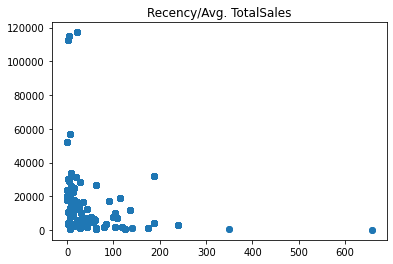

In [ ]:
plt.scatter(data['Recency'], data['Monetary'])
plt.title('Recency/Avg. TotalSales')
plt.savefig("RecedncyAvgTotalSales.png")
plt.show()

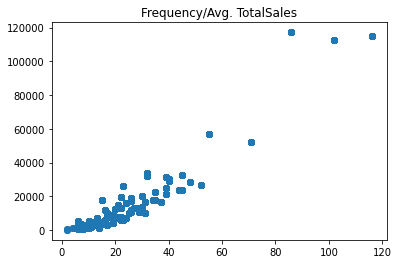

In [ ]:
plt.scatter(data['Frequency'], data['Monetary'])
plt.title('Frequency/Avg. TotalSales')
plt.savefig("FrequencyAvgTotalSales.png")
plt.show()

In [ ]:
data.to_csv('./Analysis.csv', sep=';')